Data       x     y     (x - x̄)   (y - ȳ)    (x - x̄)²       (x - x̄)(y - ȳ) Yp (Predicted)  Yp - ȳ         
1          3     30    -6.10      -25.40     37.21           154.94          33.82           -21.58         
2          8     57    -1.10      1.60       1.21            -1.76           51.51           -3.89          
3          9     64    -0.10      8.60       0.01            -0.86           55.05           -0.35          
4          13    72    3.90       16.60      15.21           64.74           69.20           13.80          
5          3     36    -6.10      -19.40     37.21           118.34          33.82           -21.58         
6          6     43    -3.10      -12.40     9.61            38.44           44.43           -10.97         
7          11    59    1.90       3.60       3.61            6.84            62.12           6.72           
8          21    90    11.90      34.60      141.61          411.74          97.50           42.10          
9          1     20

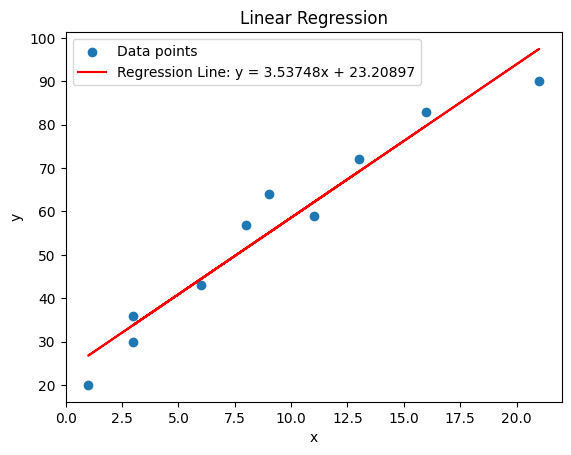

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Replace x_data and y_data with your actual data
x_data = np.array([3, 8, 9, 13, 3, 6, 11, 21, 1, 16])
y_data = np.array([30, 57, 64, 72, 36, 43, 59, 90, 20, 83])

# Calculate necessary parameters
n = len(x_data)
x_bar = np.mean(x_data)
y_bar = np.mean(y_data)

x_minus_xbar = x_data - x_bar
y_minus_ybar = y_data - y_bar
x_minus_xbar_squared = (x_minus_xbar)**2
xy_minus_xbar_ybar = x_minus_xbar * y_minus_ybar

# Correctly calculate slope (m) and y-intercept (c)
m = np.sum(xy_minus_xbar_ybar) / np.sum(x_minus_xbar_squared)
c = y_bar - m * x_bar

# Calculate predicted values (Yp)
Yp = m * x_data + c

# Calculate Yp - ȳ
Yp_minus_ybar = Yp - y_bar

# Correctly calculate R-squared value
ss_residual = np.sum((Yp - y_bar)**2)
ss_total = np.sum((y_data - y_bar)**2)
r_squared = (ss_residual / ss_total)

# Display the results in tabular format
print(f"{'Data':<10} {'x':<5} {'y':<5} {'(x - x̄)':<10} {'(y - ȳ)':<10} {'(x - x̄)²':<15} {'(x - x̄)(y - ȳ)':<15} {'Yp (Predicted)':<15} {'Yp - ȳ':<15}")
for i in range(n):
    print(f"{i+1:<10} {x_data[i]:<5} {y_data[i]:<5} {x_minus_xbar[i]:<10.2f} {y_minus_ybar[i]:<10.2f} {x_minus_xbar_squared[i]:<15.2f} {xy_minus_xbar_ybar[i]:<15.2f} {Yp[i]:<15.2f} {Yp_minus_ybar[i]:<15.2f}")

print("\nStatistics:")
print(f"{'x̄ (Mean of x)':<20} {x_bar:<.2f}")
print(f"{'ȳ (Mean of y)':<20} {y_bar:<.2f}")
print(f"{'m (Slope)':<20} {m:<.5f}")
print(f"{'c (Intercept)':<20} {c:<.5f}")
print(f"{'R² (R-squared)':<20} {r_squared:<.5f}")

# Plotting the data and regression line
plt.scatter(x_data, y_data, label='Data points')
plt.plot(x_data, Yp, color='red', label=f'Regression Line: y = {m:.5f}x + {c:.5f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()